**Name:** Ho Gia Khiem

**Student ID:** 520K0341

**Subject:** Deep Learning

**Main topic:** Basic Neural Networks *(Learning stages for Multilayer Perceptron for Regression and classification problems)*

**Topic 1:** House pricing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [ ]:
data.drop('Id', axis = 1, inplace = True)
data.Alley.fillna(value = 'No alley access', inplace = True)
data.BsmtQual.fillna(value = 'No Basement', inplace = True)
data.BsmtCond.fillna(value = 'No Basement', inplace = True)
data.BsmtExposure.fillna(value = 'No Basement', inplace = True)
data.BsmtFinType1.fillna(value = 'No Basement', inplace = True)
data.BsmtFinType2.fillna(value = 'No Basement', inplace = True)
data.FireplaceQu.fillna(value = 'No Fireplace', inplace = True)
data.GarageType.fillna(value = 'No Garage', inplace = True)
data.GarageFinish.fillna(value = 'No Garage', inplace = True)
data.GarageQual.fillna(value = 'No Garage', inplace = True)
data.GarageCond.fillna(value = 'No Garage', inplace = True)
data.PoolQC.fillna(value = 'No Pool', inplace = True)
data.Fence.fillna(value = 'No Fence', inplace = True)
data.MiscFeature.fillna(value = 'None', inplace = True)

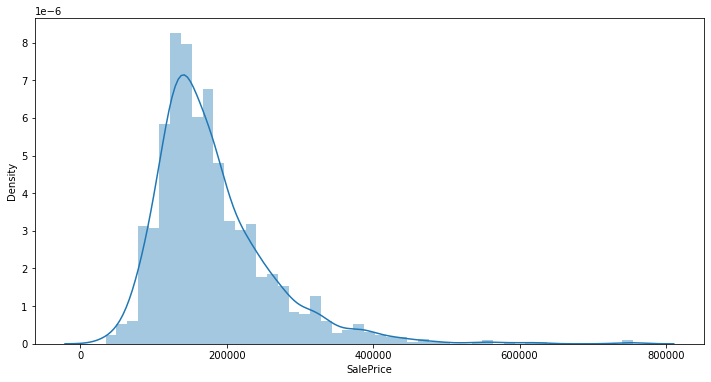

In [ ]:
plt.figure(figsize = (12, 6))
sns.distplot(data['SalePrice'])

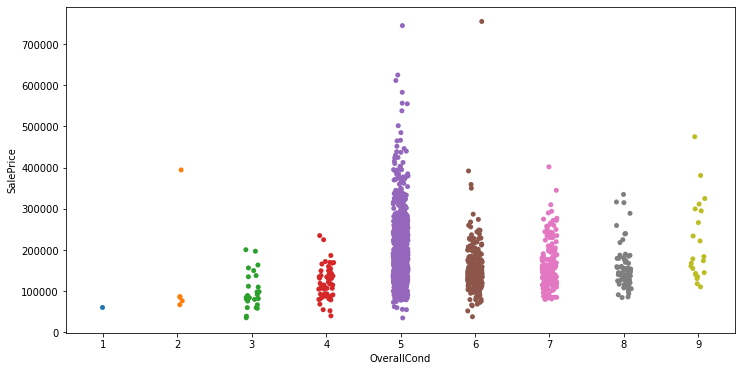

In [ ]:
plt.figure(figsize = (12, 6))
sns.stripplot(x = 'OverallCond', y = 'SalePrice', data = data)

In [ ]:
X = data.drop('SalePrice', axis = 1)
y = pd.DataFrame(data['SalePrice'])

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

features_num = X.select_dtypes(['float64', 'int64']).columns
features_cat = X.select_dtypes(['object']).columns
transformer_num = make_pipeline(SimpleImputer(strategy = "median"), StandardScaler())
transformer_cat = make_pipeline(SimpleImputer(strategy = "most_frequent"), OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
preprocessor = make_column_transformer((transformer_num, features_num), (transformer_cat, features_cat))
X_preprocessed = pd.DataFrame(preprocessor.fit_transform(X), columns = X.columns)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_preprocessed, y), columns = ['MI Scores'], index = X.columns)
corr = pd.DataFrame(X_preprocessed[X_preprocessed.columns].corrwith(y['SalePrice']), columns = ['Correlation'])
s_corr = pd.DataFrame(X_preprocessed[X_preprocessed.columns].corrwith(y['SalePrice'], method = 'spearman'), columns = ['Spearman_Correlation'])
relation = corr.join([mi, s_corr])
relation.sort_values(by = 'Correlation', ascending = False)

,Correlation,MI Scores,Spearman_Correlation
LotArea,0.790982,0.572276,0.809829
HouseStyle,0.708624,0.480209,0.731310
MasVnrArea,0.640409,0.352468,0.690711
ExterQual,0.623431,0.363927,0.649379
Neighborhood,0.613581,0.366678,0.602725
Condition1,0.605852,0.308528,0.575408
YearBuilt,0.560664,0.268270,0.635957
Exterior1st,0.533723,0.222486,0.532586
Alley,0.522897,0.365120,0.652682
LotShape,0.507101,0.252314,0.571159


In [ ]:
X_preprocessed.drop(labels = ['TotRmsAbvGrd', 'Electrical', 'OverallCond', 'BsmtFinSF2'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y, train_size = 0.8, test_size = 0.2)

In [ ]:
X_train.shape

(1168, 75)

In [ ]:
from tensorflow.keras import Sequential, layers, losses, metrics, callbacks

model = Sequential([layers.BatchNormalization(input_shape = [75]), layers.Dropout(0.3),
    layers.Dense(512, activation = 'relu'), layers.BatchNormalization(), layers.Dropout(0.2),
    layers.Dense(512, activation = 'relu'), layers.BatchNormalization(), layers.Dropout(0.3),
    layers.Dense(512, activation = 'relu'), layers.BatchNormalization(), layers.Dropout(0.2),
    layers.Dense(512, activation = 'relu'), layers.BatchNormalization(), layers.Dropout(0.3),
    layers.Dense(512, activation = 'relu'), layers.BatchNormalization(), layers.Dropout(0.2),
    layers.Dense(512, activation = 'relu'), layers.BatchNormalization(), layers.Dropout(0.3),
    layers.Dense(1)])
model.compile(optimizer = 'adam',
              loss = losses.MeanAbsoluteError(),
              metrics = [metrics.MeanAbsoluteError(name = 'mean_absolute_error', dtype = None),
                       metrics.MeanSquaredError(name = 'mean_squared_error', dtype = None),
                       metrics.RootMeanSquaredError(name = 'root_mean_squared_error', dtype = None)])
early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 20, restore_best_weights = True)
lr_rop = callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 0.2, verbose = 1, min_lr = 5e-10)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 75)               300       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 75)                0         
                                                                 
 dense (Dense)               (None, 512)               38912     
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               2

Epoch 1/1000
37/37 [==============================] - 4s 37ms/step - loss: 180618.2031 - mean_absolute_error: 180618.2031 - mean_squared_error: 38801170432.0000 - root_mean_squared_error: 196980.1250 - val_loss: 182130.2500 - val_mean_absolute_error: 182130.2500 - val_mean_squared_error: 39990743040.0000 - val_root_mean_squared_error: 199976.8594 - lr: 0.0010
Epoch 2/1000
37/37 [==============================] - 1s 27ms/step - loss: 180616.8281 - mean_absolute_error: 180616.8281 - mean_squared_error: 38800613376.0000 - root_mean_squared_error: 196978.7188 - val_loss: 182129.6094 - val_mean_absolute_error: 182129.6094 - val_mean_squared_error: 39990468608.0000 - val_root_mean_squared_error: 199976.1719 - lr: 0.0010
Epoch 3/1000
37/37 [==============================] - 1s 26ms/step - loss: 180614.4688 - mean_absolute_error: 180614.4688 - mean_squared_error: 38799679488.0000 - root_mean_squared_error: 196976.3438 - val_loss: 182127.7656 - val_mean_absolute_error: 182127.7656 - val_mean_sq

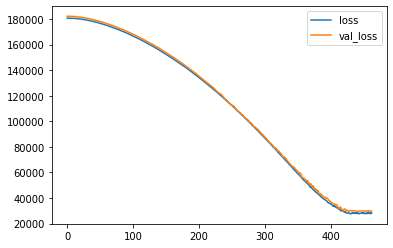

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 1000, callbacks = [early_stopping, lr_rop])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.evaluate(X_valid, y_valid)

10/10 [==============================] - 0s 8ms/step - loss: 29724.5723 - mean_absolute_error: 29724.5723 - mean_squared_error: 3057793792.0000 - root_mean_squared_error: 55297.3203


[29724.572265625, 29724.572265625, 3057793792.0, 55297.3203125]

In [ ]:
data_test = pd.read_csv('test.csv')
data_test_copy = data_test.copy(deep = True)

In [ ]:
data_test_copy.drop('Id', axis = 1, inplace = True)
data_test_copy.Alley.fillna(value = 'No alley access', inplace = True)
data_test_copy.BsmtQual.fillna(value = 'No Basement', inplace = True)
data_test_copy.BsmtCond.fillna(value = 'No Basement', inplace = True)
data_test_copy.BsmtExposure.fillna(value = 'No Basement', inplace = True)
data_test_copy.BsmtFinType1.fillna(value = 'No Basement', inplace = True)
data_test_copy.BsmtFinType2.fillna(value = 'No Basement', inplace = True)
data_test_copy.FireplaceQu.fillna(value = 'No Fireplace', inplace = True)
data_test_copy.GarageType.fillna(value = 'No Garage', inplace = True)
data_test_copy.GarageFinish.fillna(value = 'No Garage', inplace = True)
data_test_copy.GarageQual.fillna(value = 'No Garage', inplace = True)
data_test_copy.GarageCond.fillna(value = 'No Garage', inplace = True)
data_test_copy.PoolQC.fillna(value = 'No Pool', inplace = True)
data_test_copy.Fence.fillna(value = 'No Fence', inplace = True)
data_test_copy.MiscFeature.fillna(value = 'None', inplace = True)

In [ ]:
data_test_copy_preprocessed = pd.DataFrame(preprocessor.fit_transform(data_test_copy), columns = data_test_copy.columns)

In [ ]:
data_test_copy_preprocessed.drop(labels = ['TotRmsAbvGrd', 'Electrical', 'OverallCond', 'BsmtFinSF2'], axis = 1, inplace = True)

In [ ]:
deep_pred = model.predict(data_test_copy_preprocessed)
deep_pred

46/46 [==============================] - 1s 8ms/step


array([[127422.15],
       [165028.05],
       [175892.48],
       ...,
       [164512.27],
       [123904.24],
       [203507.77]], dtype=float32)

**Topic 2:** Adult dataset (Income)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
df = pd.read_csv('adult.data', sep = ",")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [ ]:
df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
    a = df.value_counts(i)
    print(f'\nValues of {a}:')


Values of 39
36    898
31    888
34    886
23    876
33    875
35    875
28    866
30    860
37    858
25    838
27    834
32    828
38    826
39    814
29    813
41    808
24    798
40    794
26    785
42    779
43    770
22    765
20    752
46    735
45    734
44    723
21    718
47    708
19    708
50    602
51    595
49    575
18    550
48    543
52    478
53    464
55    419
54    415
17    395
56    366
58    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     42
77     29
78     23
79     22
80     22
81     20
82     12
84     10
83      6
85      3
88      3
86      1
87      1
dtype: int64:

Values of  State-gov
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Nev